#  Проект Рынок заведений общественного питания Москвы   

##  1 Описание проекта 

Исходные данные : В моем расоряжении датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года.  

Цель исследования - подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места. 

##  2 Описание данных

Файл moscow_places.csv содержит следующие данные: 

   * name — название заведения;
   * address — адрес заведения;
   * category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
   * hours — информация о днях и часах работы;
   * lat — широта географической точки, в которой находится заведение;
   * lng — долгота географической точки, в которой находится заведение;
   * rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
   * price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
   * avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
      
   * «Средний счёт: 1000–1500 ₽»;
   * «Цена чашки капучино: 130–220 ₽»;
   * «Цена бокала пива: 400–600 ₽».
      и так далее;
   * middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
      
       * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
       * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
       * Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
   * middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
      
      *  Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
      *  Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
      *  Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
  *  chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
       * 0 — заведение не является сетевым
       * 1 — заведение является сетевым
   * district — административный район, в котором находится заведение, например Центральный административный округ;
   * seats — количество посадочных мест.

Ход исследования содержит следующие шаги: 

   1) Загрузка данных и изучение общей информации
   2) Предобработка данных 
   3) Анализ данных 
   4) Детализация исследования: открытие кофейни 
   5) Подготовка презентации 

## 3 1 Загрузка данных и изучение общей информации

Загрузим библиотеки, необходимые для работы 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt   
import seaborn as sns 
import numpy as np 
import plotly.express as px
from plotly import graph_objects as go 
import datetime as dt 
import json 
from folium import Map, Choropleth, Marker
from folium.plugins import MarkerCluster 
import scipy.stats as stats 
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters() 

Загрузим данные из файла /datasets/moscow_places.csv, в котором содержится информация о заведениях общественного питания Москвы

In [2]:
# Применим конструкцию try-except и сохраним файл  /datasets/moscow_places.csv 

server_path =  '/datasets/moscow_places.csv'

local_path =  "C:\\Users\\user\\Desktop\\moscow_places.csv" 

try:  
     df_moscow_places = pd.read_csv(server_path , sep = ',') 

except: 
     df_moscow_places = pd.read_csv(local_path, sep = ',') 


In [3]:
# Посчитаем количество строк в датасете 
len(df_moscow_places) 

8406

In [4]:
# Изучим общую информацию о датафрейме 
df_moscow_places.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


Всего в таблице 8406 строк и 14 столбцов. Объем данных составил 919.5 KB. Всего представлено 8406 заведений. 

      Всего 7 столбцов хранят тип данных object ('name', 'category', 'address', 'district', 'hours', 'price', 'avg-bill') ,
    6 столбцов хранят вещественный тип данных float64('lat', 'lng', 'rating','middle_avg_bill','middle_coffee_cup','seats') и       1 столбец chain хранит целочисленный тип данных int64.

Рассмотрим по отдельности каждый из столбцов

Столбец 'name' содержит информацию о названии заведения. Указан верный тип данных object.

В столбце 'category' содержится информация о категории заведения. Указан верный тип данных object. 

В столбце 'address' указан адрес заведения. Тип данных object. 

В столбце district указан административный район, в котором находится заведение. Тип данных object указан верно.

В столбце hours указана  информация о днях и часах работы, тип данных object указан верно.

Столбец lat сожержит информацию о  географической точке, в которой находится заведение, тип данных float верно указан. 

Столбец lng содержит информацию о широте географической точки, в которой находится заведение, тип данных - float. 

Столбец rating содержит рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0), тип данных - float 

Столбец price содержит информацию о категории цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее, указан верный тип данных object

Столбец avg_bill — содержит среднюю стоимость заказа в виде диапазона. Тип данных object. 

В столбце  middle_avg_bill -  число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт». Указан тип данных float.

В столбце middle_coffee_cup - число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино». Указан тип данных float. 

Столбец chain хранит число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки). Тип данных int. 

Столбец  seats содержит информацию о количестве посадочных мест. Указан тип данных float, считаю что нееобходимо поменять тип данных на int.

Поменяем тип данных для столбца seats на целочисленный, так как число посадочных мест - это дискретная величина 

In [5]:
df_moscow_places['seats'] = df_moscow_places['seats'].astype('Int64') 

In [6]:
df_moscow_places.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   Int64  
dtypes: Int64(1), float64(5), int64(1), object(7)
memory usage: 927.7+ KB


In [7]:
# выведем первые пять строк 
df_moscow_places.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,<NA>
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,<NA>
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148


In [8]:
# выведем последние пять строк 
df_moscow_places.tail() 

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
8401,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",55.670021,37.552480,4.4,NaN,NaN,NaN,NaN,0,86
8402,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",55.640875,37.656553,4.8,NaN,NaN,NaN,NaN,0,150
8403,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648859,37.743219,3.9,NaN,Средний счёт:от 150 ₽,150.0,NaN,0,150
8404,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648849,37.743222,4.2,NaN,NaN,NaN,NaN,1,150
8405,Kebab Time,кафе,"Москва, Россошанский проезд, 6",Южный административный округ,"ежедневно, круглосуточно",55.598229,37.604702,3.9,NaN,NaN,NaN,NaN,0,12


In [9]:
# выведем случайным образом 20 строк таблицы 
df_moscow_places.sample(random_state = 1, n =20) 

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
1615,Cedro Albero,пиццерия,"Москва, 4-й Вятский переулок, 10",Северный административный округ,"ежедневно, 12:00–00:00",55.801487,37.576249,4.7,NaN,NaN,NaN,NaN,0,60
6204,Эдельвейс,кафе,"Москва, Ленинский проспект, 65, корп. 3",Юго-Западный административный округ,NaN,55.692059,37.557188,2.9,NaN,NaN,NaN,NaN,0,45
89,Сахарочек,кофейня,"Москва, Дмитровское шоссе, 107А, корп. 2",Северный административный округ,пн-пт 09:00–22:00; сб 10:00–22:00; вс 10:00–21:00,55.879256,37.538444,4.5,средние,Цена чашки капучино:100–200 ₽,NaN,150.0,0,120
307,Грузинский Дом у Наны,ресторан,"Москва, Фестивальная улица, 4А, стр. 1",Северный административный округ,пн-чт 11:30–23:00; пт-вс 11:30–00:00,55.855276,37.484727,4.6,NaN,NaN,NaN,NaN,0,100
1079,Le Chaton Gris,кофейня,"Москва, Сельскохозяйственная улица, 38, корп. 2",Северо-Восточный административный округ,"пн-пт 08:00–21:00; сб,вс 09:00–21:00",55.847098,37.631961,4.2,средние,Средний счёт:от 350 ₽,350.0,NaN,0,40
4726,Сам пришёл,кафе,"Москва, Лубянский проезд, 7, стр. 1",Центральный административный округ,"ежедневно, 12:00–23:00",55.758368,37.629700,4.3,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN,1,80
7754,One Price Coffee,кофейня,"Москва, Кировоградская улица, 13А",Южный административный округ,"ежедневно, 10:00–22:00",55.612221,37.606079,3.8,NaN,NaN,NaN,NaN,1,250
7582,Порт,ресторан,"Москва, Голубинская улица, 16",Юго-Западный административный округ,"ежедневно, 09:00–22:00",55.597887,37.527186,4.2,средние,Средний счёт:600–1500 ₽,1050.0,NaN,0,114
4136,Хинкальная Легенда,ресторан,"Москва, улица Арбат, 12, стр. 2",Центральный административный округ,"пн-чт 11:00–00:00; пт,сб 11:00–03:00; вс 11:00...",55.750916,37.595661,4.4,выше среднего,NaN,NaN,NaN,1,35
5764,VIP Wok & sushi,быстрое питание,"Москва, Можайское шоссе, 45Б",Западный административный округ,"ежедневно, 11:00–23:00",55.716484,37.407236,4.2,NaN,NaN,NaN,NaN,0,16


 Вывод по Загрузке данных и изучению общей информации: 
 
   * загрузили данные из файла '/datasets/moscow_places.csv';
   * изучили общую информацию о датасете df_moscow_places и установили, что всего в  таблице 8406 строк и 14 столбцов, общий объем данных составил 927.7 КB ; 
   * для столбца seats поменяли тип данных на int 
    
Перейдем к следующему шагу исследования, где выполним предобработку данных 
    

# 4 2  Предобработка данных  

## 5 2.1 Поищем есть ли дубликаты в данных 

In [10]:
# посчитаем количество явных дубликатов
df_moscow_places.duplicated().sum()

0

In [12]:
# проверим наличие неявных дубликатов в столбцах с названием заведения и адресом 

df_moscow_places[df_moscow_places[['name','address']].duplicated()]


,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats


In [13]:
# удалим строки с неявными дубликатами в столбцах с адресом и названием заведения 
df_moscow_places[['name', 'address']] = df_moscow_places[['name', 'address']].drop_duplicates()  

In [14]:
# приведем столбец с названиями заведений к нижнему регистру 
df_moscow_places['name'] = df_moscow_places['name'].str.lower() 

In [15]:
df_moscow_places['name'].head() 

0                  wowфли
1          четыре комнаты
2                   хазри
3    dormouse coffee shop
4               иль марко
Name: name, dtype: object

In [16]:
# посчитаем количество уникальныx значений в столбце address 
df_moscow_places['address'].nunique()  

5753

In [17]:
# в переменную duplicated rows сохраним строки с дубликатами адресов
duplicated_rows = df_moscow_places[df_moscow_places['address'].duplicated()]  

# посчитаем сколько заведений расположено по каждому из повторяющихся адресов
print(duplicated_rows.groupby('address')['name'].count().unique()) 

[ 1  4  3  2  5  6  9  7 10  8 15 13 14 25 19 11 27]


    Видим, что в таблице есть адреса с 1 и более числом заведений, в целом это нормально. Однако, есть и адреса с числом заведений от 10 и более. Скорее всего, можно говорить об ошибке в данных в этом случае.

In [18]:
# посмотрим на уникальные значения в столбце category
df_moscow_places['category'].unique() 

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

Дубликатов не обнаружено.  

In [19]:
# посмторим на уникальные значения в столбце district 
df_moscow_places['district'].unique() 

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

Дубликатов не обнаружено

## 6 2.2 Поищем пропуски: встречаются ли они, в каких столбцах?

In [20]:
# посчитаем количество пропущенных значений 
df_moscow_places.isna().sum() 

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64

Видим, что в столбцах hours, price, avg_bill, middle_avg_bill, middle_coffee_cup есть пропущенные значения и seats есть пропущенные значения.

In [21]:
# посчитаем процент пропущеннных значений в столбце hours
df_moscow_places['hours'].isna().mean() * 100 

6.376397811087318

    Предполагаю, что пропущенные значения в этом столбце могут быть вызваны тем, что на сайте заведения забыли добавить информацию о часах и днях работы. Можно оставить как есть    

In [22]:
# посчитаем процент пропущенных значений в столбце price
df_moscow_places['price'].isna().mean() * 100 

60.5638829407566

Около 60 %  значений в столбце price пропущено. Удалять их нецелесообразно. Оставим пропуски незаполненными. 

In [23]:
# посчитаем процент пропущенных значений в столбце seats 
df_moscow_places['seats'].isna().mean() * 100 

42.95741137282893

    Предполагаю, что пропуски в столбце seats возникают из-за человеческого фактора . В проекте заведения забыли указать  число посадочных мест. 

In [24]:
# посчитаем процент пропущенных значений в столбце avg_bill 
df_moscow_places['avg_bill'].isna().mean() * 100 

54.603854389721626

Около 55 % значений в столбце avg_bill пропущено 

In [25]:
# посчитаем процент пропущенных значений в столбце middle_avg_bill 
df_moscow_places['middle_avg_bill'].isna().mean() * 100  

62.538662859862

Около 63 % значений в столбце middle_avg_bill пропущено 

In [26]:
# посчитаем процент пропущенных значений в столбце middle_coffee_cup
df_moscow_places['middle_coffee_cup'].isna().mean() * 100  

93.63549845348561

Пропущено около 94 % значений

    Можно с большой степенью уверенности сказать, что столбцы avg_bill, middle_avg_bill и middle_coffee_cup взамосвязаны между собой.  Так, пропуски в столбце avg_bill предполагают автоматически пропуски и в других столбцах.

## 7 2.3  Создадим  столбец street с названиями улиц из столбца с адресом. 

In [27]:
# создадим столбец street c названиями улиц из столбца с адресом.
df_moscow_places['street'] = df_moscow_places['address'].str.split(',').str[1]
df_moscow_places.sample(random_state = 1, n =10)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street
1615,cedro albero,пиццерия,"Москва, 4-й Вятский переулок, 10",Северный административный округ,"ежедневно, 12:00–00:00",55.801487,37.576249,4.7,NaN,NaN,NaN,NaN,0,60,4-й Вятский переулок
6204,эдельвейс,кафе,"Москва, Ленинский проспект, 65, корп. 3",Юго-Западный административный округ,NaN,55.692059,37.557188,2.9,NaN,NaN,NaN,NaN,0,45,Ленинский проспект
89,сахарочек,кофейня,"Москва, Дмитровское шоссе, 107А, корп. 2",Северный административный округ,пн-пт 09:00–22:00; сб 10:00–22:00; вс 10:00–21:00,55.879256,37.538444,4.5,средние,Цена чашки капучино:100–200 ₽,NaN,150.0,0,120,Дмитровское шоссе
307,грузинский дом у наны,ресторан,"Москва, Фестивальная улица, 4А, стр. 1",Северный административный округ,пн-чт 11:30–23:00; пт-вс 11:30–00:00,55.855276,37.484727,4.6,NaN,NaN,NaN,NaN,0,100,Фестивальная улица
1079,le chaton gris,кофейня,"Москва, Сельскохозяйственная улица, 38, корп. 2",Северо-Восточный административный округ,"пн-пт 08:00–21:00; сб,вс 09:00–21:00",55.847098,37.631961,4.2,средние,Средний счёт:от 350 ₽,350.0,NaN,0,40,Сельскохозяйственная улица
4726,сам пришёл,кафе,"Москва, Лубянский проезд, 7, стр. 1",Центральный административный округ,"ежедневно, 12:00–23:00",55.758368,37.629700,4.3,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN,1,80,Лубянский проезд
7754,one price coffee,кофейня,"Москва, Кировоградская улица, 13А",Южный административный округ,"ежедневно, 10:00–22:00",55.612221,37.606079,3.8,NaN,NaN,NaN,NaN,1,250,Кировоградская улица
7582,порт,ресторан,"Москва, Голубинская улица, 16",Юго-Западный административный округ,"ежедневно, 09:00–22:00",55.597887,37.527186,4.2,средние,Средний счёт:600–1500 ₽,1050.0,NaN,0,114,Голубинская улица
4136,хинкальная легенда,ресторан,"Москва, улица Арбат, 12, стр. 2",Центральный административный округ,"пн-чт 11:00–00:00; пт,сб 11:00–03:00; вс 11:00...",55.750916,37.595661,4.4,выше среднего,NaN,NaN,NaN,1,35,улица Арбат
5764,vip wok & sushi,быстрое питание,"Москва, Можайское шоссе, 45Б",Западный административный округ,"ежедневно, 11:00–23:00",55.716484,37.407236,4.2,NaN,NaN,NaN,NaN,0,16,Можайское шоссе


##  8 2.4 Создадим столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7):

In [28]:
df_moscow_places['is _24/7'] = df_moscow_places['hours'].str.contains(r'\ежедневно, круглосуточно')

In [29]:
df_moscow_places.sample(random_state=1, n =10)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is _24/7
1615,cedro albero,пиццерия,"Москва, 4-й Вятский переулок, 10",Северный административный округ,"ежедневно, 12:00–00:00",55.801487,37.576249,4.7,NaN,NaN,NaN,NaN,0,60,4-й Вятский переулок,False
6204,эдельвейс,кафе,"Москва, Ленинский проспект, 65, корп. 3",Юго-Западный административный округ,NaN,55.692059,37.557188,2.9,NaN,NaN,NaN,NaN,0,45,Ленинский проспект,NaN
89,сахарочек,кофейня,"Москва, Дмитровское шоссе, 107А, корп. 2",Северный административный округ,пн-пт 09:00–22:00; сб 10:00–22:00; вс 10:00–21:00,55.879256,37.538444,4.5,средние,Цена чашки капучино:100–200 ₽,NaN,150.0,0,120,Дмитровское шоссе,False
307,грузинский дом у наны,ресторан,"Москва, Фестивальная улица, 4А, стр. 1",Северный административный округ,пн-чт 11:30–23:00; пт-вс 11:30–00:00,55.855276,37.484727,4.6,NaN,NaN,NaN,NaN,0,100,Фестивальная улица,False
1079,le chaton gris,кофейня,"Москва, Сельскохозяйственная улица, 38, корп. 2",Северо-Восточный административный округ,"пн-пт 08:00–21:00; сб,вс 09:00–21:00",55.847098,37.631961,4.2,средние,Средний счёт:от 350 ₽,350.0,NaN,0,40,Сельскохозяйственная улица,False
4726,сам пришёл,кафе,"Москва, Лубянский проезд, 7, стр. 1",Центральный административный округ,"ежедневно, 12:00–23:00",55.758368,37.629700,4.3,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN,1,80,Лубянский проезд,False
7754,one price coffee,кофейня,"Москва, Кировоградская улица, 13А",Южный административный округ,"ежедневно, 10:00–22:00",55.612221,37.606079,3.8,NaN,NaN,NaN,NaN,1,250,Кировоградская улица,False
7582,порт,ресторан,"Москва, Голубинская улица, 16",Юго-Западный административный округ,"ежедневно, 09:00–22:00",55.597887,37.527186,4.2,средние,Средний счёт:600–1500 ₽,1050.0,NaN,0,114,Голубинская улица,False
4136,хинкальная легенда,ресторан,"Москва, улица Арбат, 12, стр. 2",Центральный административный округ,"пн-чт 11:00–00:00; пт,сб 11:00–03:00; вс 11:00...",55.750916,37.595661,4.4,выше среднего,NaN,NaN,NaN,1,35,улица Арбат,False
5764,vip wok & sushi,быстрое питание,"Москва, Можайское шоссе, 45Б",Западный административный округ,"ежедневно, 11:00–23:00",55.716484,37.407236,4.2,NaN,NaN,NaN,NaN,0,16,Можайское шоссе,False


Выводы по Предобработке данных: 

   * проверка на наличие явных дубликтов показала, что явных дубликатов не найдено в таблице df_moscow_places; 
   * проверка на наличие пропусков установила, что в определенных столбцах есть пропуски. Речь идет о столбцах с днями и часами работы заведения, с категорией цен в заведении, с количеством посадочных мест; 
   * столбцы avg_bill, middle_avg_bill и middle_coffee_cup взамосвязаны между собой.  Так, пропуски в столбце avg_bill предполагают автоматически пропуски и в других столбцах;  
   * в датасет были добавлены столбцы street  и _24/7, которые обозначают названия улиц и логическое значение True (если заведение работает ежедневно и круглосуточно) и False ( в противоположном случае) 

## 9 3 Анализ данных  

##  10 3.1 Какие категории заведений представлены в данных? Исследуем количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее. Построим визуализации. Ответим на вопрос о распределении заведений по категориям. 

In [30]:
# посчитаем общее количество заведений
number_of_total_names= df_moscow_places['name'].count()  
number_of_total_names

8406

In [31]:
# посмотрим на распределение количества заведений по каждой из категорий 


distribution_of_category = df_moscow_places.groupby('category')['name'].count().sort_values(ascending=False)
distribution_of_category = distribution_of_category.reset_index()
distribution_of_category.columns = ['category','count'] 
distribution_of_category['names_share'] = (distribution_of_category['count'] / number_of_total_names).round(2) * 100 
distribution_of_category

,category,count,names_share
0,кафе,2378,28.0
1,ресторан,2043,24.0
2,кофейня,1413,17.0
3,"бар,паб",765,9.0
4,пиццерия,633,8.0
5,быстрое питание,603,7.0
6,столовая,315,4.0
7,булочная,256,3.0


<Figure size 1500x800 with 0 Axes>

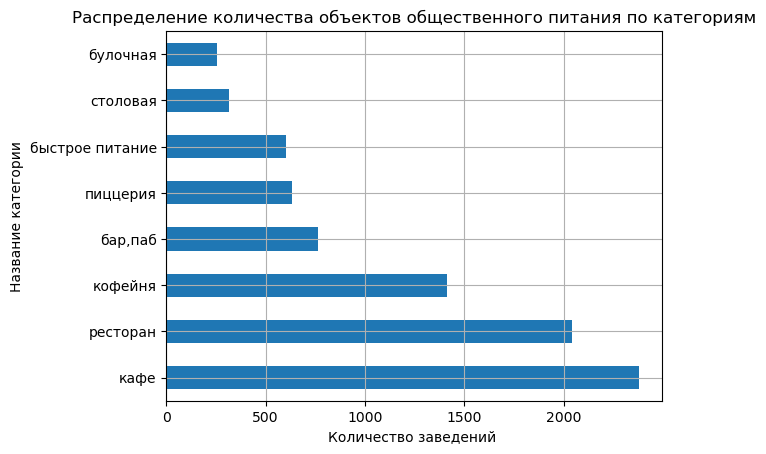

In [34]:
# визуализиуем данные, построим столбчатую диаграмму

plt.figure(figsize=(15,8))

distribution_of_category.plot(kind='barh', grid=True, x = 'category', y ='count', legend = False) 

plt.title('Распределение количества объектов общественного питания по категориям')
plt.xlabel('Количество заведений ')
plt.ylabel('Название категории')
plt.show() 

         По данным графика, можно заметить, что больше всего заведений относится к категории кафe(2377 объектов или 28 %), на втором месте по популярности рестораны(2042 объекта или 24 %), на 3 месте находятся кофейни (1413 объектов, 17 %).

##  11 3.2 Исследуем количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее. Построим визуализации. Проанализируем результаты и сделаем выводы. 

In [35]:
# рассчитаем медианное число посадочных мест в местах по категориям 
seats_of_category = df_moscow_places.pivot_table(index = 'category', values = 'seats', aggfunc ='median').sort_values(by ='seats', ascending = False) 
seats_of_category

,seats
category,
ресторан,86.0
"бар,паб",82.5
кофейня,80.0
столовая,75.5
быстрое питание,65.0
кафе,60.0
пиццерия,55.0
булочная,50.0


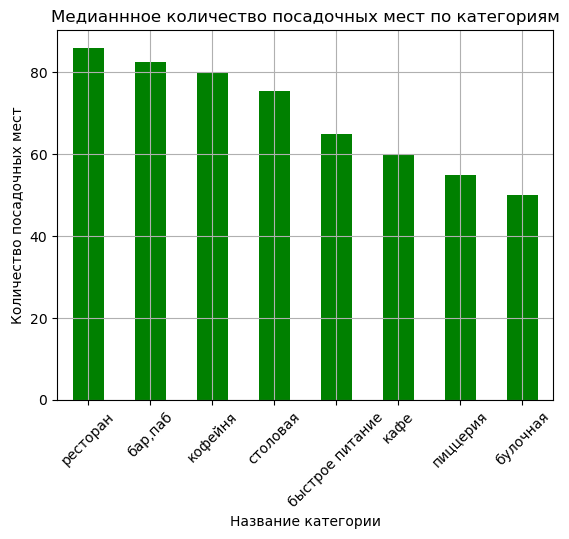

In [36]:
# визуализиуем данные, построим столбчатую диаграмму 



seats_of_category.plot(kind='bar', grid=True, color = 'g', legend = False) 

plt.title('Медианнное количество посадочных мест по категориям')
plt.xlabel('Название категории')
plt.ylabel('Количество посадочных мест')
plt.xticks(rotation = 45)

plt.show() 

       Согласно данным графика, медианное число посадочных мест во всех категориях находится от 50 до 86. В среднем медианное число больше у категории ресторана, на втором месте бар,паб, на третьем месте кофейня. 

## 12 3.3 Рассмотрим и изобразим соотношение сетевых и несетевых заведений в датасете. Каких заведений больше? 

In [37]:
print('Количество несетевых заведений:', df_moscow_places[df_moscow_places['chain'] == 0]['name'].count())
print('Количество сетевых заведений:', df_moscow_places[df_moscow_places['chain'] == 1]['name'].count())

Количество несетевых заведений: 5201
Количество сетевых заведений: 3205


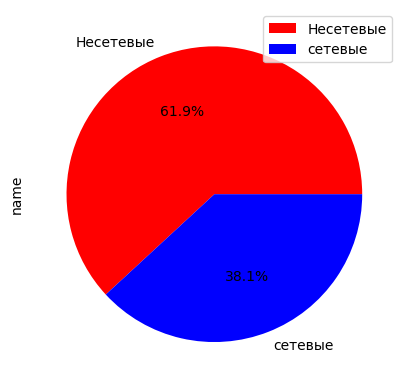

In [38]:
# визуализируем данные, построим круговую диаграмму

df_moscow_places.groupby('chain')['name'].count().plot(kind='pie', labels = ['Несетевые', 'сетевые'], autopct = '%1.1f%%', colors =['r', 'b'])
plt.legend()
plt.show() 

Круговая диаграмма показала, что 61.9 % заведений относятся к несетевым, а 38.1 % относятся к сетевым заведениям

## 13 3.4 Какие категории заведений чаще являются сетевыми? Исследуйте данные и ответьте на вопрос графиком 

Рассмотрим соотношение сетевых и несетевых заведений по категориям  

In [39]:
category_chain = df_moscow_places.pivot_table(index = 'category', columns = 'chain', values = 'name', aggfunc = 'count') 
category_chain.columns = ['non-chain', 'chain']

# расситаем процентное соотношение сетевых и несетевых заведений по категориям заведений 
category_chain['share_of_chain'] = round((category_chain['chain'] / (category_chain['non-chain'] + category_chain['chain']) * 100),2)
category_chain['share_of_non-chain'] = round((category_chain['non-chain'] / (category_chain['non-chain'] + category_chain['chain']) * 100),2)

category_chain = category_chain.drop(columns = ['chain','non-chain'])

 
category_chain.columns = ['доля сетевых заведений в %', 'доля несетевых заведений в %'] 
category_chain 




,доля сетевых заведений в %,доля несетевых заведений в %
category,,
"бар,паб",22.09,77.91
булочная,61.33,38.67
быстрое питание,38.47,61.53
кафе,32.76,67.24
кофейня,50.96,49.04
пиццерия,52.13,47.87
ресторан,35.73,64.27
столовая,27.94,72.06


<Figure size 1600x900 with 0 Axes>

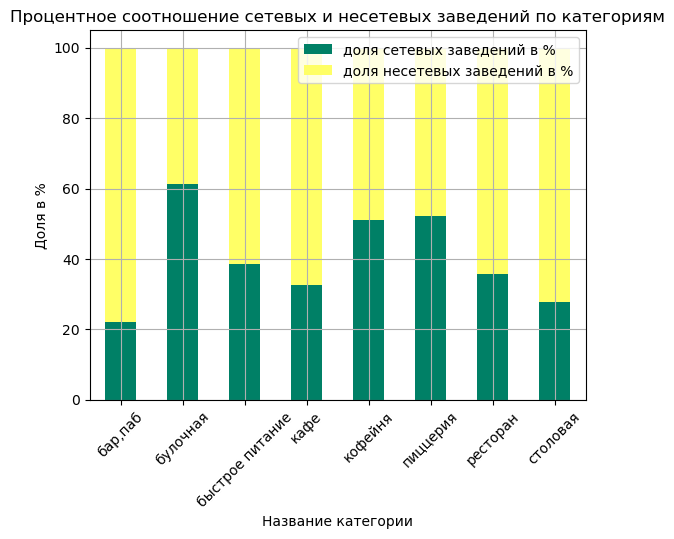

In [41]:
plt.figure(figsize=(16,9))

category_chain.plot(kind = 'bar', stacked = True, grid = True, colormap = 'summer') 

plt.title('Процентное соотношение сетевых и несетевых заведений по категориям') 
plt.xlabel('Название категории')
plt.xticks(rotation = 45)
plt.ylabel('Доля в %')
plt.legend()
plt.show() 


     В целом, данные графика свидетельствуют о том, что доля сетевых заведений по категориям меньше чем доля несетевых. Однако, в категории заведений 'булочная' доля сетевых заведений больше чем доля несетевых (61.33 % против 38.67 %) . Также можно заметить, что в категории 'кофейня' и 'пиццерия' доля сетевых и несетевых заведений примерно равная. У кофеен соотношение 51 % на 49 % в пользу сетевых, у пиццерий соотношение 52 % на 48 % в пользу сетевых.

## 14 3.5 Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве. Под популярностью понимается количество заведений этой сети в регионе. Построим подходящую для такой информации визуализацию. 

<Figure size 1600x800 with 0 Axes>

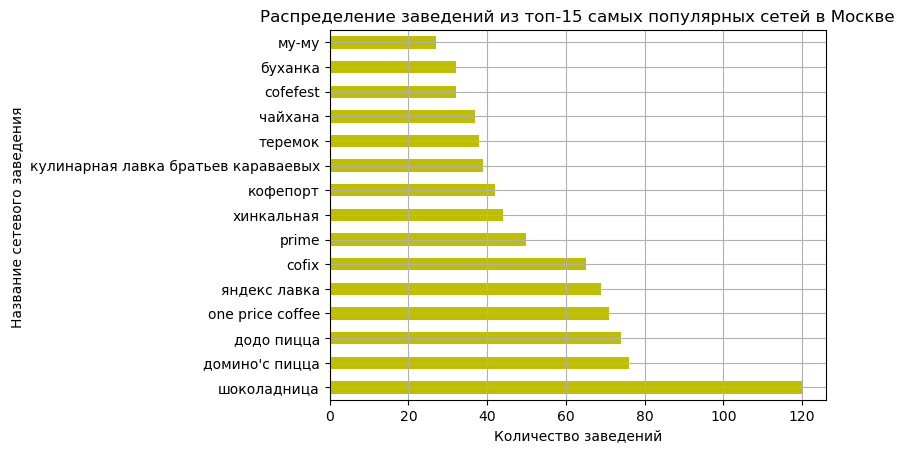

In [42]:
# найдем топ-15 популярных сетей в Москве 

plt.figure(figsize=(16,8))

df_top_15 = df_moscow_places[df_moscow_places['chain'] == 1].groupby('name')[['name','address']].count().sort_values(by='address', ascending= False).head(15)


df_top_15.plot(kind='barh', grid = True, y ='name', color= 'y', legend = None) 
plt.title('Распределение заведений из топ-15 самых популярных сетей в Москве')
plt.xlabel('Количество заведений')
plt.ylabel('Название сетевого заведения ') 

plt.show()

      По данным графика, можно сделать вывод, что наибольшее количество заведений принадлежит сети кофеен 'Шокладница'. На втором месте по числу заведенией находится сеть пиццерий 'Домино's пицца'. На третьем месте находится еще одна сеть пиццерий 'додо пицца'. 


## 15 3.6 Знакомы ли вам эти сети? Есть ли какой-то признак, который их объединяет? К какой категории заведений они относятся?¶

      Большинство из вышеуказанных сетей мне знакомы. Могу предположить, что все сети объединены по признаку широкого ассортимента продукции и относительно доступного уровня цен. Представленные на графике сетевые заведения относятся к 8 категориям( булочная, кофейня, кафе, быстрое питание, ресторан, пиццерия, бар, паб, столовая). При этом некоторые сети относятся к сразу нескольким категориям. Например, хинкальная представлена в 5 категориях(кафе, ресторан, быстрое питание, бар,паб, столовая). 

## 16 3.7  Какие административные районы Москвы присутствуют в датасете? Отобразим общее количество заведений и количество заведений каждой категории по районам.  Проиллюстрируем эту информацию одним графиком.

In [43]:
# посмотрим на распределение количества заведений каждой категории по районам 

district_of_category = df_moscow_places.pivot_table(index = 'district', columns ='category', values = 'name', aggfunc='count')
district_of_category 

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
district,,,,,,,,
Восточный административный округ,53,25,71,272,105,72,160,40
Западный административный округ,50,37,62,239,150,71,218,24
Северный административный округ,68,39,58,235,193,77,189,41
Северо-Восточный административный округ,63,28,82,269,159,68,182,40
Северо-Западный административный округ,23,12,30,115,62,40,109,18
Центральный административный округ,364,50,87,464,428,113,670,66
Юго-Восточный административный округ,38,13,67,282,89,55,145,25
Юго-Западный административный округ,38,27,61,238,96,64,168,17
Южный административный округ,68,25,85,264,131,73,202,44


In [44]:
# посчитаем долю завдеений каждой категории по всем административным округам 
df_categories_and_districts  =  (df_moscow_places.groupby(['district', 'category'], as_index=False)
                              .agg(count_object=('name', 'count')))

df_categories_and_districts['sum_object'] = df_categories_and_districts.groupby('district')['count_object'].transform(sum) 
df_categories_and_districts['ratio'] = round(df_categories_and_districts['count_object'] / df_categories_and_districts['sum_object'], 3) 
df_categories_and_districts.sample(random_state =1, n=15) 

,district,category,count_object,sum_object,ratio
19,Северный административный округ,кафе,235,900,0.261
55,Юго-Восточный административный округ,столовая,25,714,0.035
10,Западный административный округ,быстрое питание,62,851,0.073
68,Южный административный округ,кофейня,131,892,0.147
53,Юго-Восточный административный округ,пиццерия,55,714,0.077
26,Северо-Восточный административный округ,быстрое питание,82,891,0.092
39,Северо-Западный административный округ,столовая,18,409,0.044
54,Юго-Восточный административный округ,ресторан,145,714,0.203
33,Северо-Западный административный округ,булочная,12,409,0.029
59,Юго-Западный административный округ,кафе,238,709,0.336


In [47]:
# построим столбчатую диаграмму 
fig = px.bar(df_categories_and_districts,
             x='ratio',
             y='district',
             color='category',
             title='Распределение заведений в разрезе категорий по округам',
             text=round(df_categories_and_districts['ratio']*100, 2)) 
fig.update_xaxes(title_text='Относительная доля заведений')
fig.update_yaxes(title_text='Название административного округа')
fig.show() 

График позволяет сделать следующие выводы: 

   * в ЦАО практически 2300 заведений, что можно объяснить близостью к историческим памятникам культуры и отдыха, также доля баров и пабов в ЦАО выше чем в любом другом районе (16.2 %) 
   * меньше всего заведений общественного  питания находится в СЗАО(около 400); 
   * если отбросить ЦАО и СЗАО, то распределение заведений примерно одинаковое в остальных 7 административных округах( от 700 до 1000) 
   * в ЮВАО наибольшая доля кафе среди остальных административных округов (39.5 %) ;
   * наибольшая доля столовых зафиксирована в ВАО (5 %) 
    

 ##  17 3.8 Визуализируем распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги в разных типах общепита?

In [48]:
# определим средний рейтинг по категориям заведений, округлим до двух знаков после запятой 
average_rating_of_category = round(df_moscow_places.groupby('category')['rating'].mean().reset_index(),2).sort_values (by = 'rating',ascending=False)
average_rating_of_category 

,category,rating
0,"бар,паб",4.39
5,пиццерия,4.30
6,ресторан,4.29
4,кофейня,4.28
1,булочная,4.27
7,столовая,4.21
3,кафе,4.12
2,быстрое питание,4.05


In [49]:
# строим столбчатую гистограмму 
fig = px.histogram(average_rating_of_category, 
                   x = 'category', 
                   y = 'rating',
                   color = 'category', 
                   title = 'Распределение средних рейтингов по категориям заведений', 
                   nbins = 500,
                   range_y=[0,5],
                   barmode = 'relative') 
fig.update_xaxes(title_text = 'Название категории')
fig.update_yaxes(title_text = 'Средний рейтинг') 
fig.show() 
             

     По данным гистограммы, можно сделать вывод, что усредненные рейтинги в разных категориях общепита различаются несильно. Усреднённые рейтинги находятся в диапазоне от 4.05 до 4.39. 

##  18 3.9 Построим фоновую картограмму (хороплет) со средним рейтингом заведений каждого района. Границы районов Москвы, которые встречаются в датасете, хранятся в файле admin_level_geomap.geojson.

In [50]:
# определим средний рейтинг заведений по каждому административному округу. 
average_rating_of_district = round(df_moscow_places.groupby('district')['rating'].mean().reset_index(),2).sort_values(by='rating', ascending=False)
average_rating_of_district

,district,rating
5,Центральный административный округ,4.38
2,Северный административный округ,4.24
4,Северо-Западный административный округ,4.21
1,Западный административный округ,4.18
8,Южный административный округ,4.18
0,Восточный административный округ,4.17
7,Юго-Западный административный округ,4.17
3,Северо-Восточный административный округ,4.15
6,Юго-Восточный административный округ,4.10


In [54]:
# читаем файл и сохраняем в переменной
with open('C:\\Users\\user\\Desktop\\admin_level_geomap.geojson','r') as f:
    geo_json = json.load(f)

print(json.dumps(geo_json, indent=2, ensure_ascii=False, sort_keys=True)) 

{
  "features": [
    {
      "geometry": {
        "coordinates": [
          [
            [
              [
                37.8756653,
                55.825342400000004
              ],
              [
                37.876001599999995,
                55.8249027
              ],
              [
                37.8730967,
                55.8237936
              ],
              [
                37.8689418,
                55.8228697
              ],
              [
                37.869206999999996,
                55.822363200000005
              ],
              [
                37.868322500000005,
                55.822211100000004
              ],
              [
                37.867472,
                55.823703
              ],
              [
                37.86851090000001,
                55.82391880000001
              ],
              [
                37.87046039999999,
                55.8242706
              ],
              [
                37.87172779999

In [59]:
# загружаем JSON-файл с границами округов Москвы 
moscow_districts = '/datasets/admin_level_geomap.geojson'
moscow_districts = 'C:\\Users\\user\\Desktop\\admin_level_geomap.geojson'

 # moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

 # создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

 # создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data = moscow_districts,
    data = average_rating_of_district,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color= 'PuRd', 
    fill_opacity=0.8,
    legend_name='Медианный рейтинг заведений по районам Москвы',
).add_to(m) 

 # выводим карту m 
m